In [287]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [288]:
df=pd.read_csv('titanic.csv')
df

,PassengerId,Name,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,"Braund, Mr. Owen Harris",3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,"Heikkinen, Miss. Laina",3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,1,0,113803,53.1000,C123,S,1
4,5,"Allen, Mr. William Henry",3,male,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,"Montvila, Rev. Juozas",2,male,27.0,0,0,211536,13.0000,NaN,S,0
887,888,"Graham, Miss. Margaret Edith",1,female,19.0,0,0,112053,30.0000,B42,S,1
888,889,"Johnston, Miss. Catherine Helen ""Carrie""",3,female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0
889,890,"Behr, Mr. Karl Howell",1,male,26.0,0,0,111369,30.0000,C148,C,1


In [289]:
df.columns

Index(['PassengerId', 'Name', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'Survived'],
      dtype='object')

In [290]:
df.drop(['PassengerId','Name','SibSp','Ticket','Parch','Cabin','Embarked'],axis=1,inplace=True)

In [291]:
df

,Pclass,Sex,Age,Fare,Survived
0,3,male,22.0,7.2500,0
1,1,female,38.0,71.2833,1
2,3,female,26.0,7.9250,1
3,1,female,35.0,53.1000,1
4,3,male,35.0,8.0500,0
...,...,...,...,...,...
886,2,male,27.0,13.0000,0
887,1,female,19.0,30.0000,1
888,3,female,NaN,23.4500,0
889,1,male,26.0,30.0000,1


In [292]:
df.isna().sum()

Pclass        0
Sex           0
Age         177
Fare          0
Survived      0
dtype: int64

In [293]:
import math
df['Age']=df['Age'].fillna(df['Age'].mean()).astype(int)

In [294]:
df.isna().sum()

Pclass      0
Sex         0
Age         0
Fare        0
Survived    0
dtype: int64

In [295]:
df['Age'].unique()

array([22, 38, 26, 35, 29, 54,  2, 27, 14,  4, 58, 20, 39, 55, 31, 34, 15,
       28,  8, 19, 40, 66, 42, 21, 18,  3,  7, 49, 65,  5, 11, 45, 17, 32,
       16, 25,  0, 30, 33, 23, 24, 46, 59, 71, 37, 47, 70, 12,  9, 36, 51,
       44,  1, 61, 56, 50, 62, 41, 52, 63, 43, 60, 10, 64, 13, 48, 53, 57,
       80,  6, 74])

In [296]:
from sklearn.preprocessing import LabelEncoder
lab=LabelEncoder()
df['Sex']=lab.fit_transform(df['Sex'])
df

,Pclass,Sex,Age,Fare,Survived
0,3,1,22,7.2500,0
1,1,0,38,71.2833,1
2,3,0,26,7.9250,1
3,1,0,35,53.1000,1
4,3,1,35,8.0500,0
...,...,...,...,...,...
886,2,1,27,13.0000,0
887,1,0,19,30.0000,1
888,3,0,29,23.4500,0
889,1,1,26,30.0000,1


In [297]:
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [298]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=0)

In [299]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred

array([0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0], dtype=int64)

In [300]:
y_test

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0], dtype=int64)

In [308]:
model.predict(x_test[:10])
model.predict_proba(x_test[:10])


array([[9.63225426e-01, 3.67745744e-02],
       [9.62251897e-01, 3.77481028e-02],
       [9.33734083e-01, 6.62659168e-02],
       [1.31520893e-04, 9.99868479e-01],
       [3.95104119e-01, 6.04895881e-01],
       [7.75981549e-01, 2.24018451e-01],
       [7.07414046e-05, 9.99929259e-01],
       [1.87033476e-05, 9.99981297e-01],
       [2.86342427e-01, 7.13657573e-01],
       [3.87945471e-01, 6.12054529e-01]])

In [301]:
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay,classification_report
cm=confusion_matrix(y_test,y_pred)
cm

array([[87, 23],
       [16, 53]], dtype=int64)

In [302]:
score=accuracy_score(y_test,y_pred)*100
score

78.2122905027933

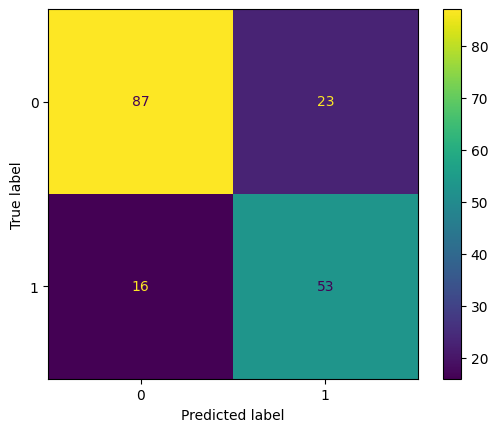

In [303]:
labels=[0,1]
cmd=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=labels)
cmd.plot()

In [304]:
report=classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.84      0.79      0.82       110
           1       0.70      0.77      0.73        69

    accuracy                           0.78       179
   macro avg       0.77      0.78      0.77       179
weighted avg       0.79      0.78      0.78       179

